In [7]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from  scipy.stats import hypergeom


In [6]:
annot_files=[snakemake.input[0],snakemake.input[1]]


NameError: name 'snakemake' is not defined

In [7]:
fusion_info = {}
normal_counts = {}
for annot_file in annot_files:
    with open(annot_file,"r") as hand:
        for line in hand:
            fields = line.rstrip().split("\t")
            genes = sorted(fields[1].split("::"))
            fin = float(fields[3])
            annot = fields[6]
            if "overlaps" in annot:
                continue
            gene_name = "::".join(genes)
          
            if "FAIL:RP" not in annot and "PASS:RT" not in annot and "pFAIL" in line:
                annot = "FAIL:RP:" + annot[5:]
            ffigf = float(fields[2])
            read_count = int(fields[4])
            for g,c in zip(genes,fields[5].split(";")):
                normal_counts[g] = c
            fusion_info[gene_name] = (genes,fin,annot,ffigf,annot,read_count)


NameError: name 'annot_files' is not defined

In [14]:

X = []
Y = []
separated_fusions = {}
np_fusions = {}
for x,y in fusion_info.items():
    t = y[4]
    if "segdup" in y[4]:
        t = "FAIL:segdup"
        continue
    elif "lowsup" in y[4]:
        t = "FAIL:lowsup"
        continue
    elif "lowfin" in y[4]:
        t = "FAIL:lowfin"
    elif "noncoding" in y[4]:
        t = "FAIL:noncoding"
        continue
    elif "RP:badstrand" in y[4]:
        t = "FAIL:RP"

    if t not in separated_fusions:
        separated_fusions[t] = ([],[],[])
    separated_fusions[t][0].append(y[1])
    separated_fusions[t][1].append(y[3])
    separated_fusions[t][2].append(y[5])
for t in separated_fusions.keys():
    np_fusions[t] = (np.array(separated_fusions[t][0]),np.array(separated_fusions[t][1]),np.array(separated_fusions[t][2]))



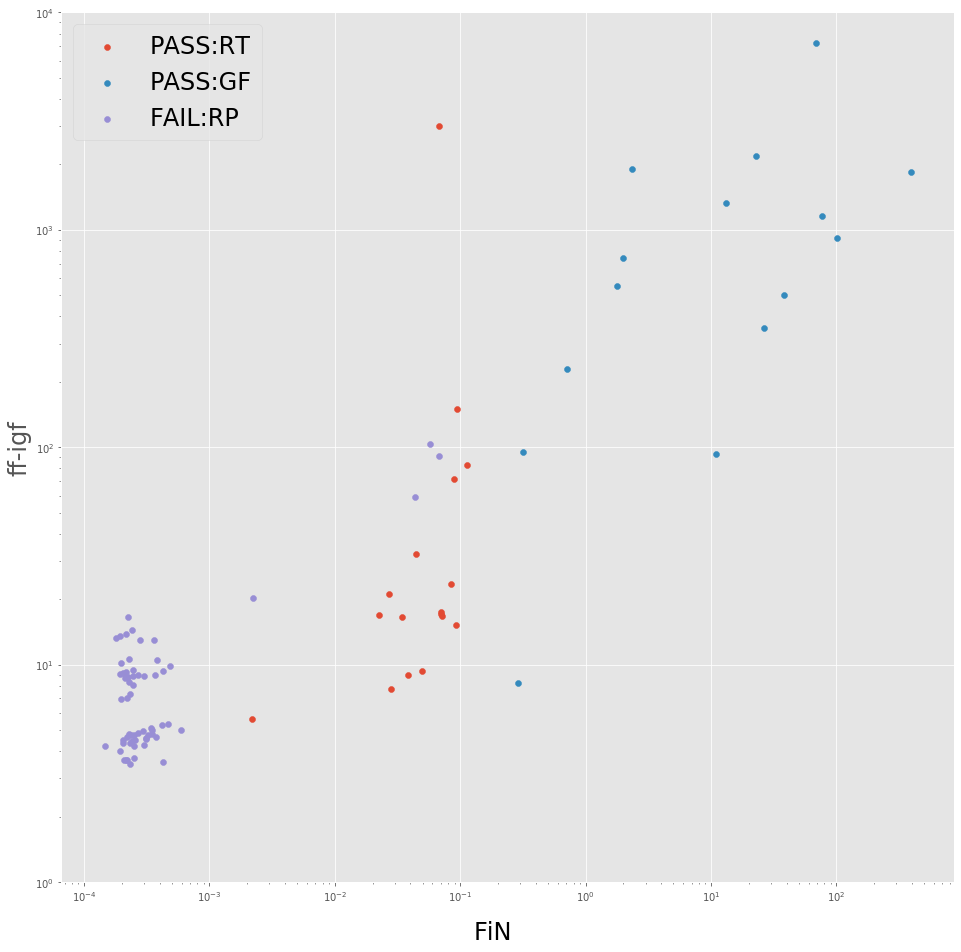

In [16]:
# import matplotlib.cm as cm

plt.style.use('ggplot')
fig = plt.figure(figsize=(16,16))


ax1 = fig.add_subplot()

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(bottom=1,top=10**4)
colors = ["red","cyan","blue"] 
for c,kv in zip(colors,separated_fusions.items()):
    k,v =kv
    X = v[0]
    Y = v[1]
    ax1.scatter(X,Y,label=k)
plt.legend(fontsize=24)

    
fig.text(0.5, 0.075, 'FiN', ha='center',fontsize=24)

ax1.set_ylabel("ff-igf",fontsize=24)
plt.savefig("fin_ffigf.png",dpi=300)

